<a href="https://colab.research.google.com/github/mdpw/msc-ai-cw/blob/main/full_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [87]:
# 1. Load the dataset
file_path = "https://raw.githubusercontent.com/mdpw/msc-ai-cw/main/dataset/garment_defect_dataset_2.csv"  # Use raw content URL
df = pd.read_csv(file_path)

In [88]:
# 2. Basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (12534, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12534 entries, 0 to 12533
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FabricType                   12534 non-null  object 
 1   StitchCount                  12534 non-null  float64
 2   ThreadTension                12534 non-null  float64
 3   SeamStrength                 12534 non-null  float64
 4   ColorConsistency             12534 non-null  int64  
 5   MeasurementAccuracy          12534 non-null  float64
 6   ButtonAttachmentStrength     12534 non-null  float64
 7   LabelPositionAccuracy        12534 non-null  int64  
 8   PrintAlignment               12534 non-null  object 
 9   BrokenStitches               12534 non-null  float64
 10  OilStains                    12534 non-null  int64  
 11  LooseThreads                 12534 non-null  int64  
 12  IroningQuality               125

In [89]:
# 3. Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
        StitchCount  ThreadTension  SeamStrength  ColorConsistency  \
count  12534.000000   12534.000000  12534.000000      12534.000000   
mean      47.960287       3.998089     32.000062          0.686293   
std        7.715162       0.498846      5.017853          0.464017   
min       30.000000       2.500000      8.430874          0.000000   
25%       42.731194       3.665541     28.659324          0.000000   
50%       47.999452       3.996316     31.988108          1.000000   
75%       53.179362       4.332680     35.287726          1.000000   
max       78.627708       5.963119     51.270376          1.000000   

       MeasurementAccuracy  ButtonAttachmentStrength  LabelPositionAccuracy  \
count         12534.000000              12534.000000            12534.00000   
mean             99.447744                 30.014487                0.49992   
std               0.331473                  5.739103                0.50002   
min              98.897318  

In [90]:
# 4. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
FabricType                     0
StitchCount                    0
ThreadTension                  0
SeamStrength                   0
ColorConsistency               0
MeasurementAccuracy            0
ButtonAttachmentStrength       0
LabelPositionAccuracy          0
PrintAlignment                 0
BrokenStitches                 0
OilStains                      0
LooseThreads                   0
IroningQuality                 0
PackingQuality                 0
Shift                          0
GarmentType                    0
Humidity                       0
Temperature                    0
ProductionTimePerPiece(min)    0
DefectCountInBatch             0
IsDefective                    0
dtype: int64



Target Distribution:
IsDefective
0    6267
1    6267
Name: count, dtype: int64


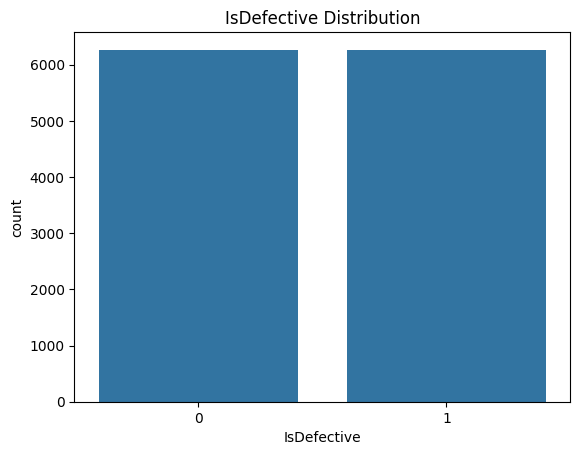

In [91]:
# 5. Class distribution (IsDefective)
print("\nTarget Distribution:")
print(df['IsDefective'].value_counts())
sns.countplot(x='IsDefective', data=df)
plt.title('IsDefective Distribution')
plt.show()

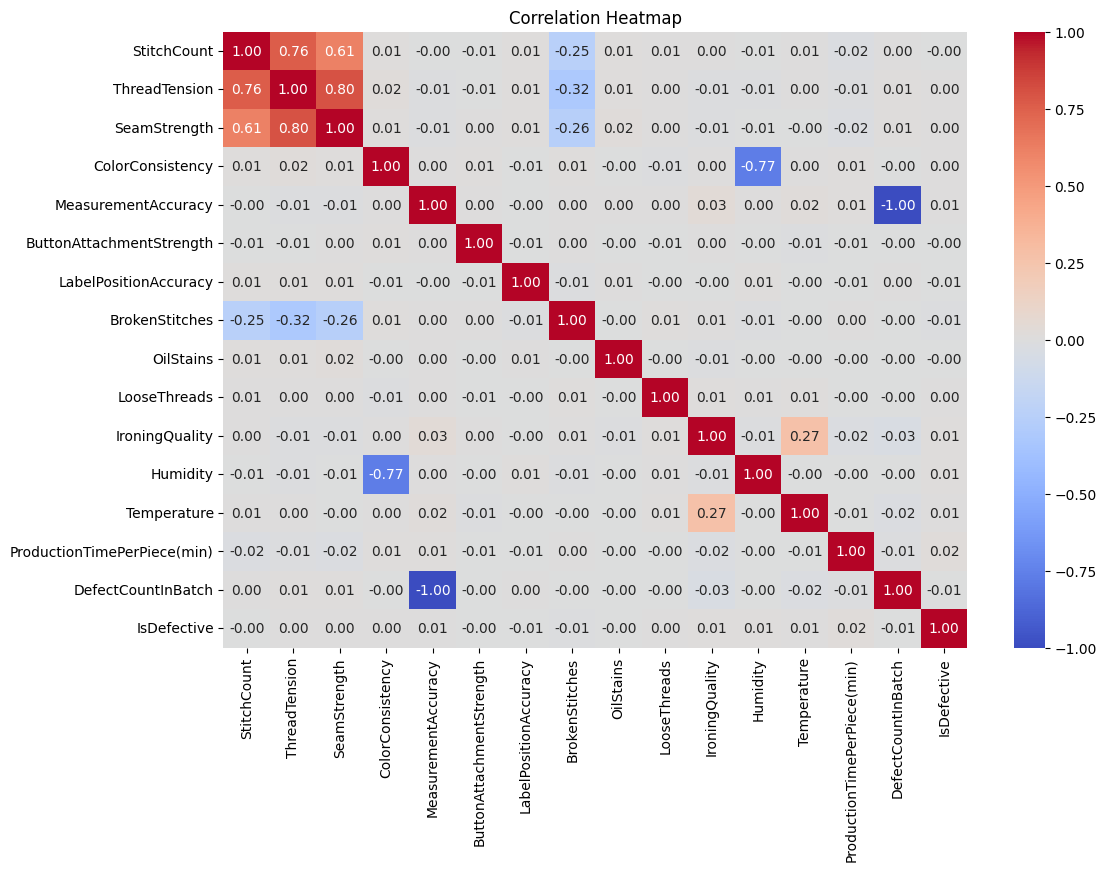

In [92]:
# 6. Correlation Matrix (Numerical Features Only)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

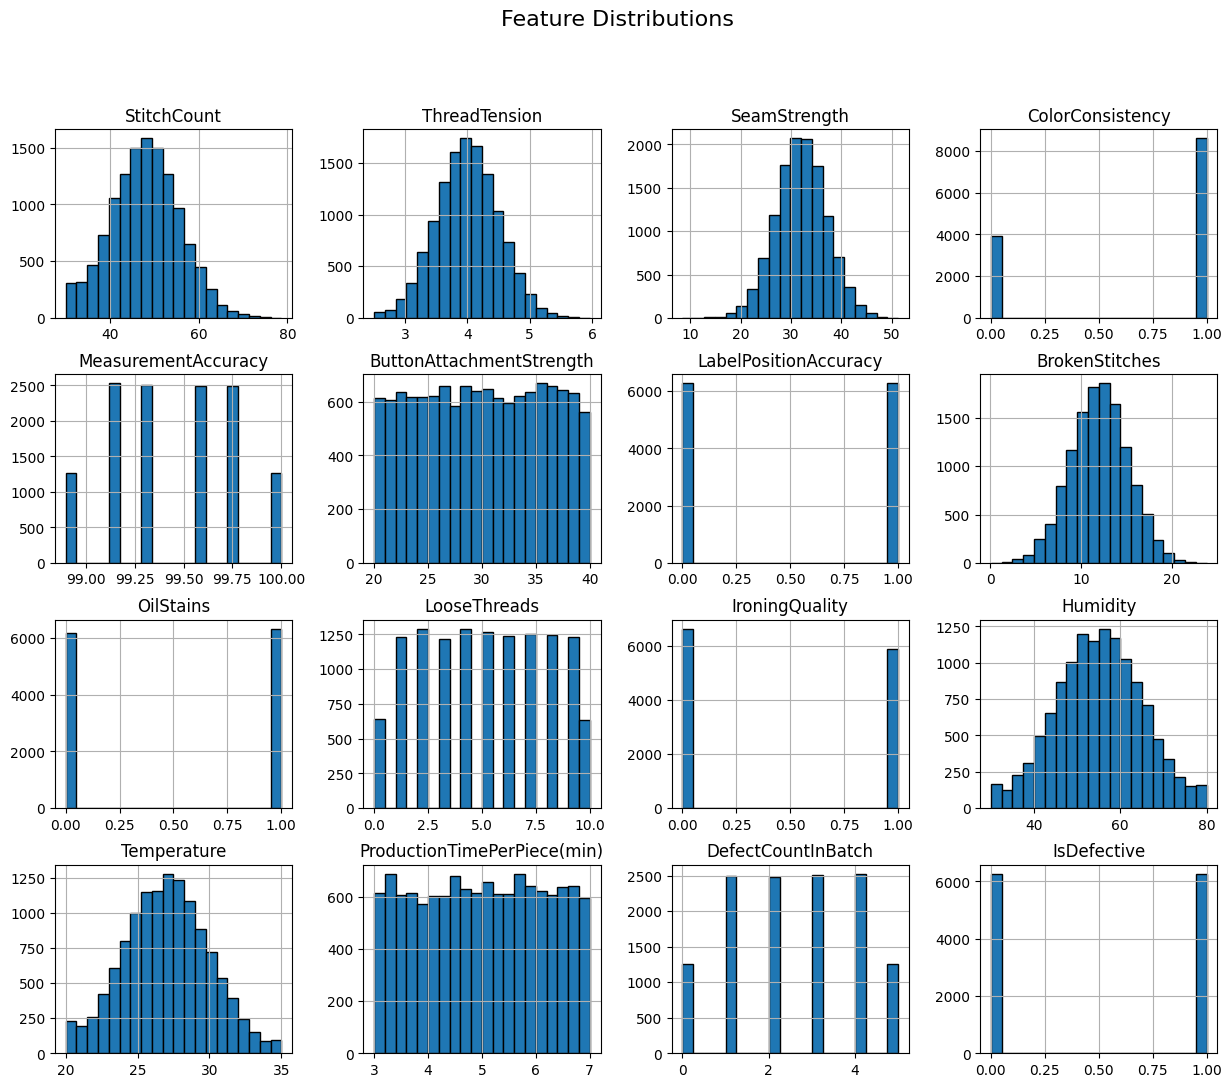

In [93]:
# 7. Distribution of each numerical feature
numeric_cols = numeric_df.columns
df[numeric_cols].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [94]:
# 8. Pairplot (optional - can be slow for large datasets)
#sns.pairplot(df[numeric_cols[:5].to_list() + ['IsDefective']], hue='IsDefective')
#plt.show()


In [95]:
# 9. Outlier detection (Boxplots)
#for col in numeric_cols:
#    plt.figure(figsize=(6, 4))
#    sns.boxplot(data=df, x='IsDefective', y=col)
#    plt.title(f'Boxplot of {col} by IsDefective')
#    plt.show()

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import Dataset, DataLoader
import torch

In [102]:
# Define column groups
categorical_cols = [
    "FabricType", "PrintAlignment",
    "PackingQuality", "Shift", "GarmentType", "DefectCountInBatch"
]
binary_cols = ["ColorConsistency", "LabelPositionAccuracy", "OilStains", "IroningQuality"]
numeric_cols = [
    "StitchCount", "ThreadTension", "SeamStrength", "MeasurementAccuracy",
    "ButtonAttachmentStrength", "BrokenStitches", "LooseThreads",
    "Humidity", "Temperature", "ProductionTimePerPiece(min)",
]
target_col = "IsDefective"

In [103]:
# Split features and target
X = df[categorical_cols + binary_cols + numeric_cols]
y = df[target_col].values

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ("num", StandardScaler(), numeric_cols)
], remainder='passthrough')  # Pass binary columns as-is

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, stratify=y, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# PyTorch Dataset class
class GarmentDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create DataLoaders
train_dataset = GarmentDataset(X_train_tensor, y_train_tensor)
test_dataset = GarmentDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)